In [1]:
import pandas as pd
pd.set_option('mode.use_inf_as_na', True)
import os
import sys 
import time
import numpy as np
import matplotlib.pyplot as plt 

num_class = 10
path = '/root/ricequant/'
df = pd.read_csv(path+'merge.csv', dtype={'ticker':str})
start = time.time()
df['yr'] = df.groupby('ticker')['close'].apply(lambda x: x.diff(-1) / x)
df = df[df['date'] > '2006']

In [2]:
def AddFactorLabel(df, num_class, factor_name):
    d = df.groupby('date', as_index=False).apply(lambda x: pd.qcut(x[factor_name], q=num_class, labels=False, duplicates='drop'))
    label = d.reset_index(level=0)[factor_name]
    df[factor_name + '_label'] = label

def PlotFactor(df, num_class, factor_name):
    temp = df.groupby(factor_name+'_label')['yr'].mean().to_dict()
    print(temp)
    plt.title('%s corr %lf' %(factor_name, df['yr'].corr(df[factor_name])))
    plt.bar(range(len(temp.keys())), [temp[i] for i in temp.keys()])
    plt.show()
    return df

In [3]:
df['alpha6'] = df.groupby('ticker', as_index=False).apply(lambda x : -x['open'].rolling(10).corr(x['volume'].rolling(10))).reset_index(level=0)[0]
AddFactorLabel(df, num_class, 'alpha6')

In [4]:
df['alpha33'] = df.groupby('ticker', as_index=False).apply(lambda x: (x['open']/x['close']).rank()).reset_index(level=0)[0]
AddFactorLabel(df, num_class, 'alpha33')

{0.0: -0.0002862573158064751, 1.0: -0.0004935996323616107, 2.0: -0.000702726149214117, 3.0: -0.0007960890747711565, 4.0: -0.0007723017428910338, 5.0: -0.0008402212385193589, 6.0: -0.0008580096011591261, 7.0: -0.000866761294687934, 8.0: -0.0009229465982027572, 9.0: -0.0004045768089929065}


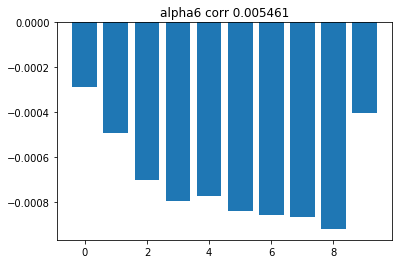

In [5]:
a=PlotFactor(df, num_class, 'alpha6')

{0: -0.0017468735043794272, 1: -0.000998885303895025, 2: -0.0008852896200861154, 3: -0.0008984609822678448, 4: -0.000923433312394963, 5: -0.000912742290642331, 6: -0.000939729534103965, 7: -0.000675692672498224, 8: -0.0006313427862318343, 9: 0.00043158811323553646}


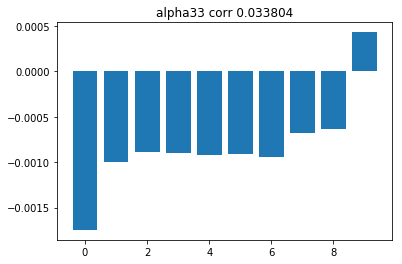

In [6]:
a=PlotFactor(df, num_class, 'alpha33')